## Simulation of Hospital Management System
### Evidence-based design project

<hr>

# First
### Generate imaginary dataset within some time interval
For patients admitted into a hospital, along the length of stay 

In [1]:
from scipy.stats import poisson
from random import randint

count = 1000
def patient_name():
    global count
    pid = ''.join(['NYC',str(count)])
    count += 1
    return pid
    

def admission_date():
    mm, dd, yy = randint(3, 4), randint(1, 28), randint(2015, 2015)
    d = datetime(yy, mm, dd)
    return d.date() 


def rand_pois(mu=2):
    r = poisson.rvs(mu, size=1)[0] # random lenght based on an arbitrary mean
    return r


def patient_log():
    
    stay = rand_pois(mu=2)        # an arbitrary mean of how long a patient stays at hospital
    ic = rand_pois(mu=0.1)        # approximately! assuming ~10% of patients go into IC rooms
    if ic > 0: ic_room = 'yes' 
    else: ic_room = 'no'
    
    return [patient_name(), admission_date(), stay, ic_room]

### write the patients data into a csv file

In [2]:
import csv
from datetime import datetime

NUM_PATIENTS = 2000

with open('patients-data.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['PatientID', 'AdmitDay', 'DaysStay', 'ICRoom'])
    for i in range(NUM_PATIENTS):
        spamwriter.writerow(patient_log())

Validate dataset consistency

In [11]:
import pandas as pd


def icroom_percentage():
    n = len(data[data.ICRoom == 'yes'])
    percent = float(n) / NUM_PATIENTS * 100
    return percent

def avg_stay():
    avg = float(sum(data.DaysStay)) / NUM_PATIENTS
    return avg

data = pd.read_csv('patients-data.csv') 
print("{} patients were admitted between March/April 2015".format(NUM_PATIENTS))
print("{}% admitted into IC Rooms".format(icroom_percentage()))
print("{} day(s) is the average stay of a patient".format(avg_stay()))
data

2000 patients were admitted between March/April 2015
9.4% admitted into IC Rooms
2.062 day(s) is the average stay of a patient


,PatientID,AdmitDay,DaysStay,ICRoom
0,NYC1000,2015-03-23,3,no
1,NYC1001,2015-03-20,1,no
2,NYC1002,2015-03-02,0,no
3,NYC1003,2015-04-19,1,no
4,NYC1004,2015-04-06,2,no
5,NYC1005,2015-03-06,3,yes
6,NYC1006,2015-04-27,2,no
7,NYC1007,2015-04-17,4,no
8,NYC1008,2015-03-14,2,no
9,NYC1009,2015-04-11,1,no


# Second
### Exploring the patients dataset
read the file generated from above

In [4]:
data = pd.read_csv('patients-data.csv')

**Aggregate patients' admissions per date**

Using a dictionary where, key: the date, value: number of admission

In [5]:
days = list(set(data.AdmitDay))
day_admit = {}
for day in days:
    num_admit = len(data[data.AdmitDay == day])
    day_admit[day] = num_admit

**Number of admissions per day (with ordering dates)**

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

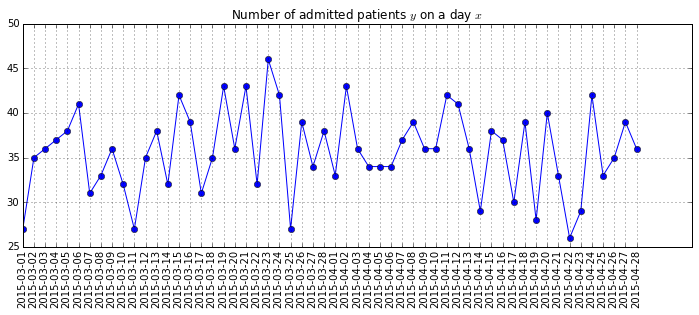

In [7]:
plt.figure(figsize=(12,4))
ordered_admits = []
for k, v in sorted(day_admit.items()):
    ordered_admits.append(v)
plt.plot(ordered_admits, '-o')
plt.title('Number of admitted patients $y$ on a day $x$')
plt.xticks(range(len(day_admit)), sorted(day_admit.keys()), rotation = 90)
plt.grid();plt.show()

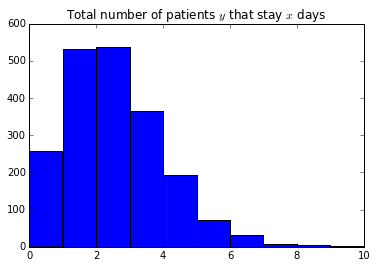

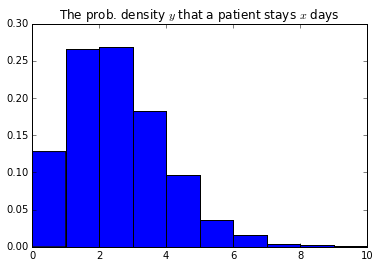

notice the mean of the distribution is approximately = 2, which was originally used in poisson.rvs(mu=2, size=1) to generate the random length of stay in the dataset.


In [8]:
days = data.DaysStay
plt.hist(days, bins=max(days))
plt.title("Total number of patients $y$ that stay $x$ days");plt.show()
plt.hist(days, bins=max(days), normed=True)
plt.title("The prob. density $y$ that a patient stays $x$ days");plt.show()

print("notice the mean of the distribution is approximately = 2, which was originally used in poisson.rvs(mu=2, size=1) to generate the random length of stay in the dataset.")

**Example** for total number of patients who were admitted for 1 day

In [9]:
l = len(data[data.DaysStay == 1])
print('{} patients stayed for 1 day during the time interval March through April of 2015.'.format(l))

535 patients stayed for 1 day during the time interval March through April of 2015.


<hr>

### Reference


paper (uses poisson distribution): Simple Queuing Theory Tools You Can Use in Healthcare
http://www.iienet.org/uploadedFiles/SHS_Community/Resources/Simple%20Queuing%20Theory%20Tools%20You%20Can%20Use%20In%20Healthcare.pdf

time series analysis http://nbviewer.ipython.org/github/changhiskhan/talks/blob/master/pydata2012/pandas_timeseries.ipynb

time series analysis with statsmodel 
http://conference.scipy.org/scipy2011/slides/mckinney_time_series.pdf